Initial exploration of 311 data

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# import matplotlib as mpl
import seaborn as sns

/Users/mmolli/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [28]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Download data

https://data.sfgov.org/City-Infrastructure/Case-Data-from-San-Francisco-311-SF311-/vw6y-z8j6 (export csv)

## And rename with timestamp

```bash
$ mv Case_Data_from_San_Francisco_311__SF311.csv Case_Data_from_San_Francisco_311__SF311_2016-02-10.csv
```

In [2]:
df = pd.read_csv('Case_Data_from_San_Francisco_311__SF311_2016-02-10.csv', header=0, index_col=0, parse_dates=[1, 2, 3])

/Users/mmolli/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(1551763, 15)

In [4]:
df.head()

,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
﻿CaseID,,,,,,,,,,,,,,,
5549430,2016-02-09 00:45:26,NaT,2016-02-09 00:45:26,Open,Open,311 Service Request Queue,General Requests,311CustomerServiceCenter - 311CustomerServiceC...,311CustomerServiceCenter - 311CustomerServiceC...,Not associated with a specific address,0,NaN,NaN,Web Self Service,NaN
5549428,2016-02-09 00:38:28,NaT,2016-02-09 00:39:24,Open,accepted,Recology_Abandoned,Street and Sidewalk Cleaning,Garbage_and_Debris,Furniture,Intersection of 24TH AVE and IRVING ST,4,Outer Sunset,"(37.7633258607475, -122.482482403396)",Voice In,NaN
5549427,2016-02-09 00:38:22,NaT,2016-02-09 00:38:23,Open,accepted,Recology_Abandoned,Street and Sidewalk Cleaning,Garbage_and_Debris,Furniture,"459 SPRUCE ST, SAN FRANCISCO, CA, 94118",2,NaN,"(37.786780965, -122.453620664)",Open311,NaN
5549425,2016-02-09 00:35:54,NaT,2016-02-09 00:37:54,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Garbage_and_Debris,Oil_paint_other_liquid_spill_wet,Intersection of 24TH AVE and IRVING ST,4,Outer Sunset,"(37.7633258607475, -122.482482403396)",Voice In,NaN
5549424,2016-02-09 00:34:14,NaT,2016-02-09 00:34:15,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,Intersection of GRANADA AVE and HOLLOWAY AVE,7,Ingleside,"(37.7218431240432, -122.457163051847)",Web Self Service,NaN


In [5]:
df['Category'].value_counts()

Street and Sidewalk Cleaning    542410
Graffiti Public Property        149972
Graffiti Private Property       116523
Abandoned Vehicle               115290
General Requests                 95624
Damaged Property                 66148
SFHA Requests                    62197
Sewer Issues                     53158
Streetlights                     43888
Tree Maintenance                 40538
Street Defects                   34052
Litter Receptacles               33588
Illegal Postings                 31459
Sign Repair                      28845
Rec and Park Requests            26997
Sidewalk or Curb                 24615
MUNI Feedback                    22667
Temporary Sign Request           17047
311 External Request             16642
Blocked Street or SideWalk       12355
Residential Building Request      6952
Catch Basin Maintenance           4666
Color Curb                        3306
Interdepartmental Request         1049
Noise Report                       991
Unpermitted Cab Complaint

In [19]:
df['Opened_ymd'] = df['Opened'].map(lambda x: x.strftime('%Y-%m-%d'))

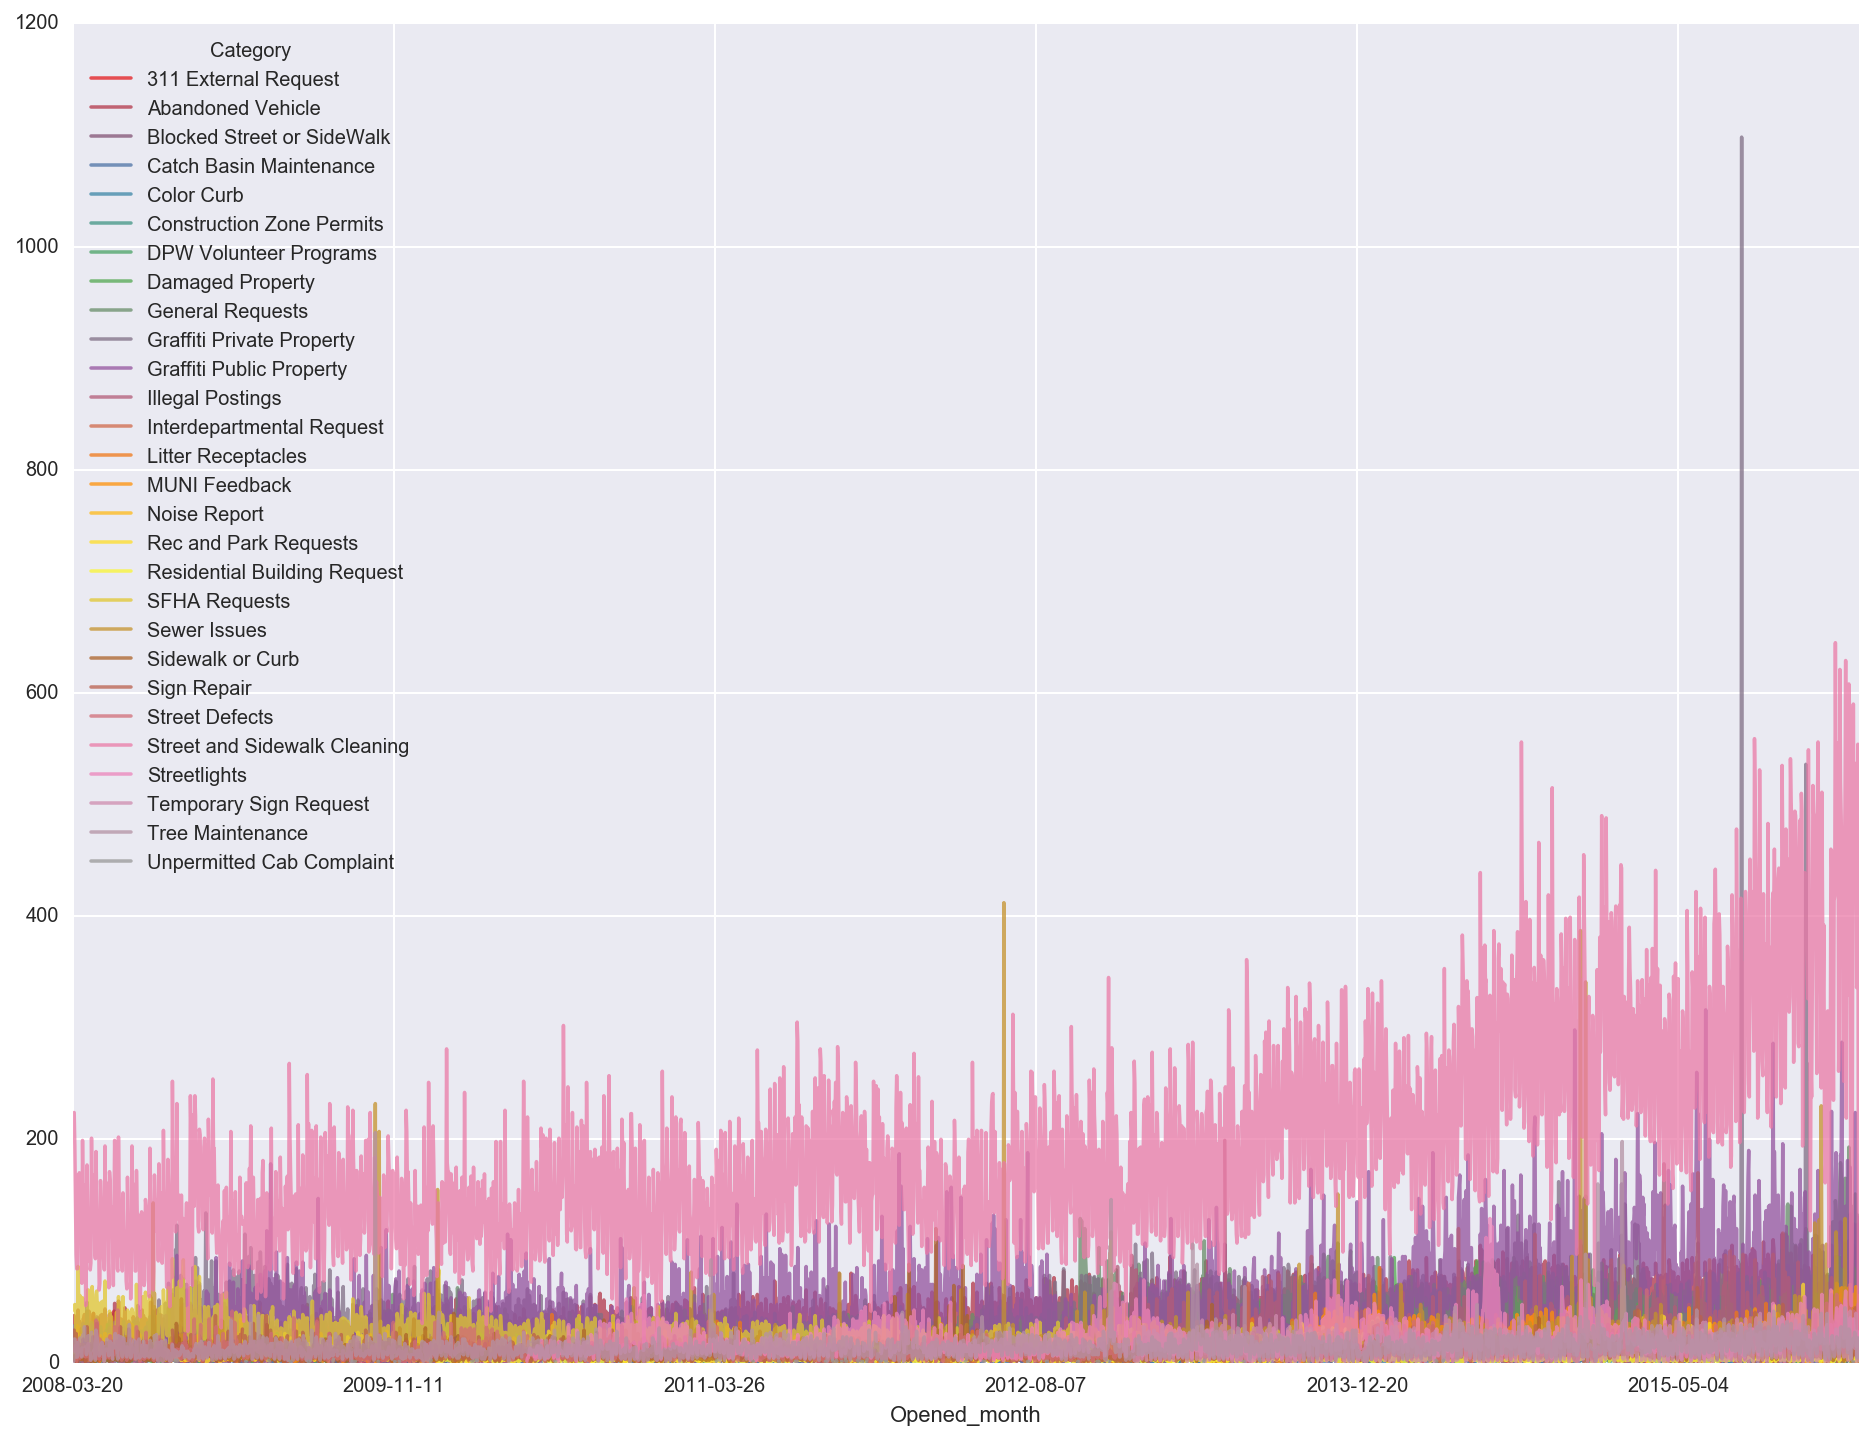

In [56]:
fix, ax = plt.subplots(figsize=(16, 12))
colormap='Set1'
df.groupby(by=['Opened_ymd', 'Category'])['Opened'].count().unstack().plot(ax=ax, colormap=colormap, alpha=.75)

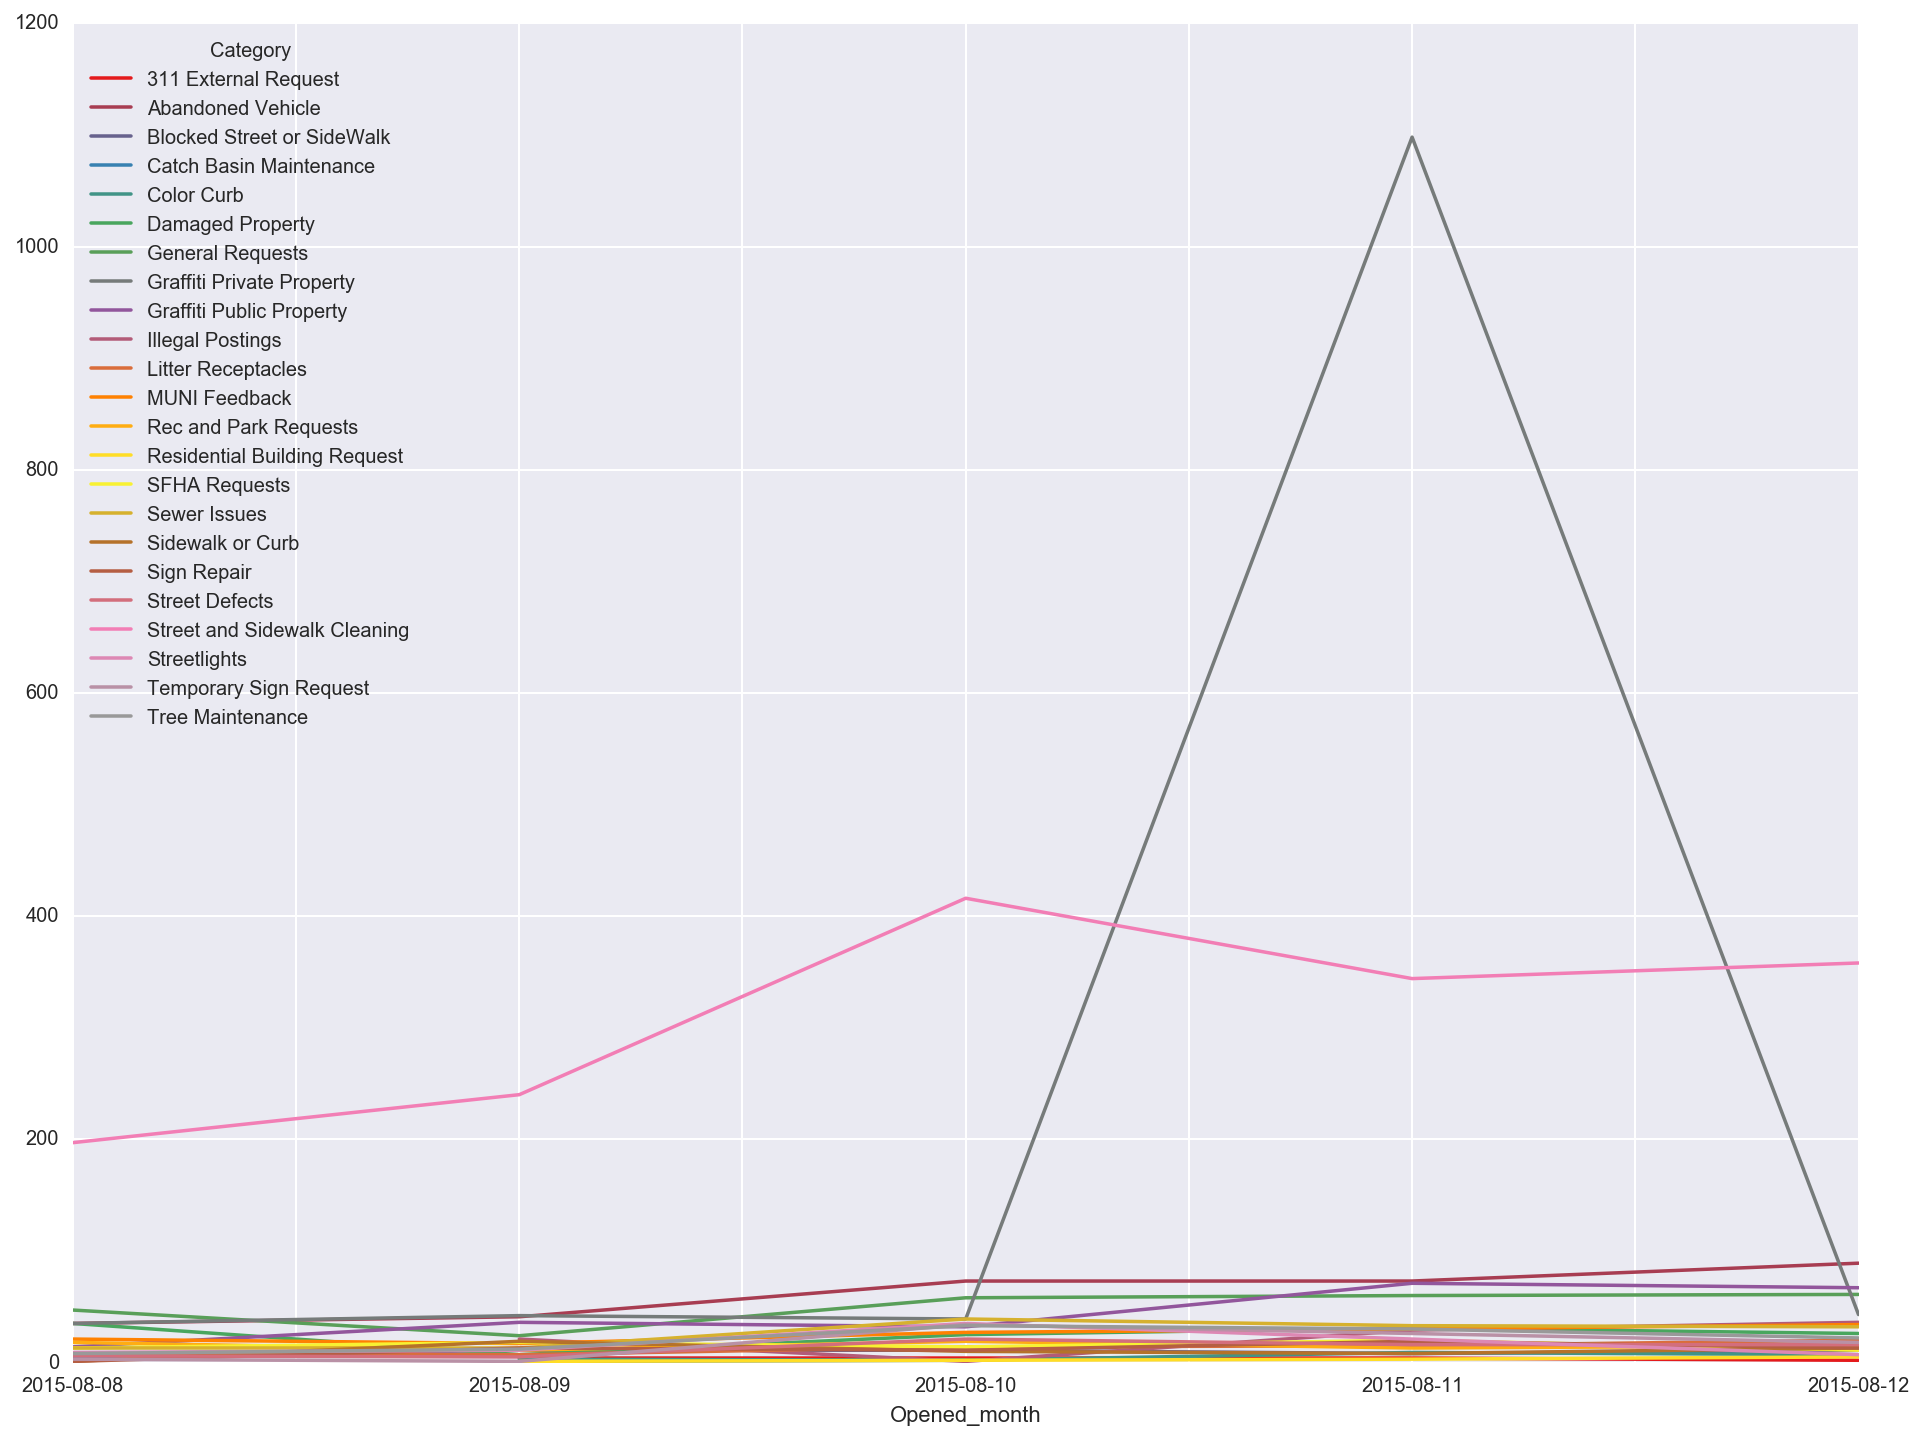

In [43]:
fix, ax = plt.subplots(figsize=(16, 12))
colormap='Set1'
df[(df['Opened'] > '2015-08-08') & (df['Opened'] < '2015-08-13')].groupby(by=['Opened_ymd', 'Category'])['Opened'].count().unstack().plot(ax=ax, colormap=colormap)

In [58]:
df[(df['Category'] == 'Street and Sidewalk Cleaning')]['Neighborhood'].value_counts().head(10)

Mission                  74236
South of Market          48628
Downtown/Civic Center    28013
Bayview                  23181
Tenderloin               20169
Western Addition         19881
Excelsior                16597
Bernal Heights           14787
Nob Hill                 14758
Outer Sunset             13805
Name: Neighborhood, dtype: int64

In [57]:
df[(df['Category'] == 'Noise Report')]['Neighborhood'].value_counts().head(10)

South of Market    93
Mission            90
Outer Sunset       55
Civic Center       48
Lower Nob Hill     40
Noe Valley         28
Mission Dolores    27
Inner Richmond     21
Pacific Heights    21
Marina             19
Name: Neighborhood, dtype: int64

In [69]:
df[(df['Opened_ymd'] == '2015-08-11')]['Category'].value_counts().head(10)

Graffiti Private Property       1098
Street and Sidewalk Cleaning     344
Abandoned Vehicle                 73
Graffiti Public Property          71
General Requests                  60
Sewer Issues                      33
Damaged Property                  31
Tree Maintenance                  30
MUNI Feedback                     30
Illegal Postings                  29
Name: Category, dtype: int64

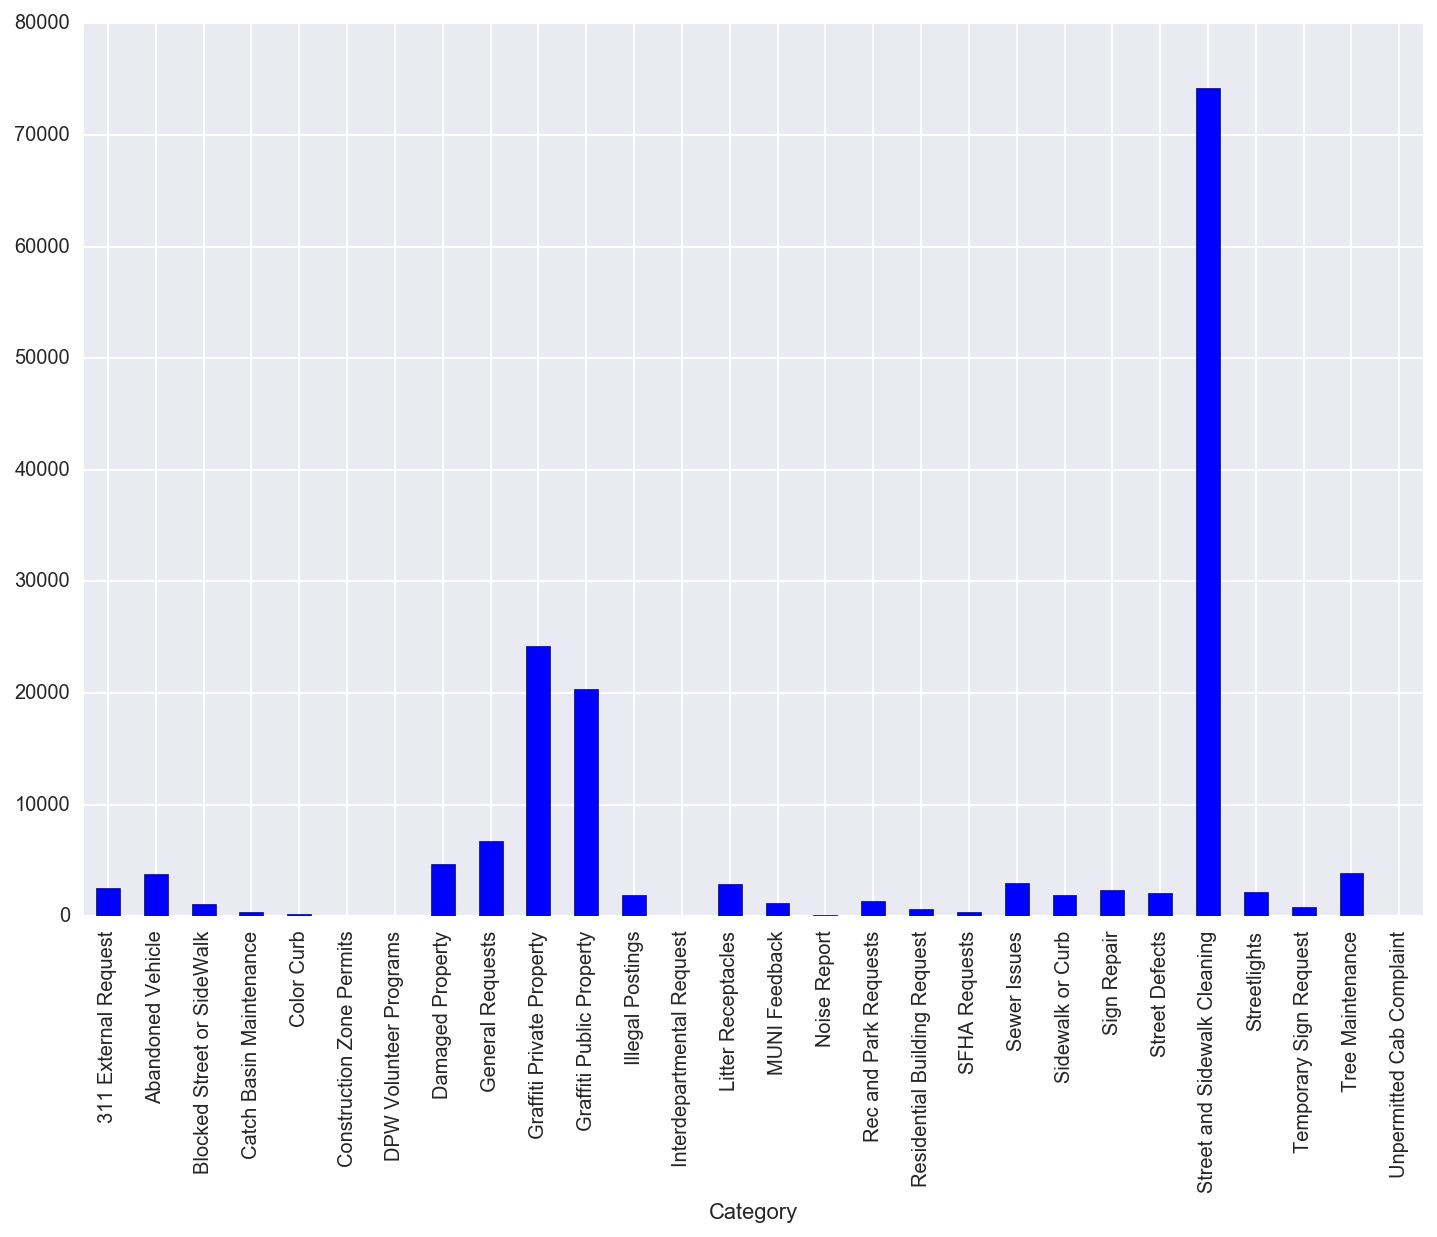

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))
df.groupby(by=['Category', 'Neighborhood'])['Opened'].count().unstack()['Mission'].T.plot(ax=ax, kind='bar')